In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Data from 1980-01-01 to 2019-09-30

In [2]:
df_history = pd.read_csv('https://data.calgary.ca/api/views/uqjm-jxgp/rows.csv?accessType=DOWNLOAD')

In [3]:
# subset the dataset to extract PM25 data
df_hist = df_history.loc[df_history['Parameter']=='PM2.5 Mass',['Date','Average Daily Value']]
# format the date column
df_hist['Date'] = pd.to_datetime(df_hist['Date'])

### Data from 2021-09-15 to 2023-05-19

In [4]:
df_current = pd.read_csv('https://data.calgary.ca/api/views/g9s5-qhu5/rows.csv?accessType=DOWNLOAD')

In [5]:
# subset the dataset to extract PM25 data
df_curr = df_current.loc[df_current['Parameter']=='Fine Particulate Matter',['ReadingDate','Value']]
# format the date column
df_curr['Date'] = pd.to_datetime(df_curr['ReadingDate'])

### Combine datasets

In [6]:
df_combined = pd.concat([
    df_hist.rename(columns={'Average Daily Value':'Value'}),
    df_curr
]).set_index('Date')
df_daily_mean = df_combined.resample('D').mean()
df_weekly_max = df_daily_mean.resample('7D').max()

### Visualizations

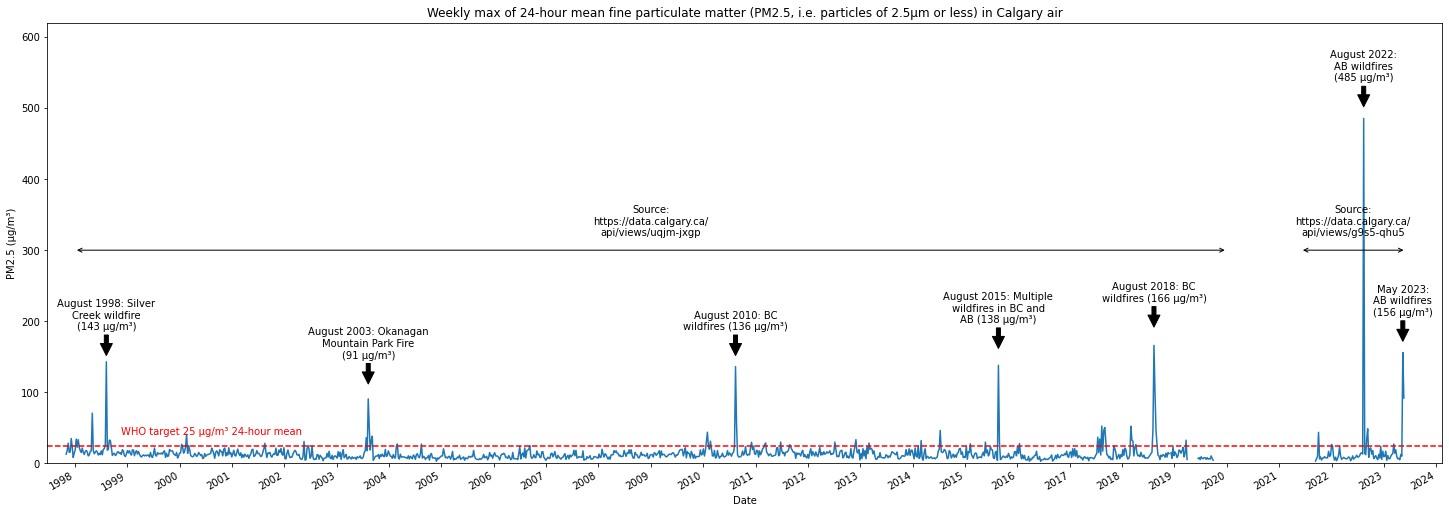

In [7]:
fig, ax = plt.subplots(figsize=(25,9))
df_weekly_max.plot(ax=ax, legend=False)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()
ax.set_title('Weekly max of 24-hour mean fine particulate matter (PM2.5, i.e. particles of 2.5μm or less) in Calgary air')
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 (μg/m³)')

margin = df_weekly_max.shape[0]/10
ax.set_xlim(ax.get_xlim()[0]-margin, ax.get_xlim()[1]+2*margin)
ax.set_ylim(0,620)

kws = dict(
    xycoords='data', xytext=(0, 25), textcoords='offset points',
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='center', verticalalignment='bottom'
)

annotations = [
    ('1998-08-08',150,'August 1998: Silver\nCreek wildfire\n(143 μg/m³)'),
    ('2003-08-09',110,'August 2003: Okanagan\nMountain Park Fire\n(91 μg/m³)'),
    ('2010-08-14',150,'August 2010: BC\nwildfires (136 μg/m³)'),
    ('2015-08-22',160,'August 2015: Multiple\nwildfires in BC and\nAB (138 μg/m³)'),
    ('2018-08-11',190,'August 2018: BC\nwildfires (166 μg/m³)'),
    ('2022-08-13',500,'August 2022:\nAB wildfires\n(485 μg/m³)'),
    ('2023-05-13',170,'May 2023:\nAB wildfires\n(156 μg/m³)'),
]

for annot in annotations:
    ax.annotate(annot[2], xy=(pd.to_datetime(annot[0]), annot[1]), **kws)

ax.text(
    pd.to_datetime('2009-01-01'), 320,
    'Source:\nhttps://data.calgary.ca/\napi/views/uqjm-jxgp',
    ha='center'
)
ax.annotate('', xy=(pd.to_datetime('1998-01-01'),300), xytext=(pd.to_datetime('2020-01-01'),300), arrowprops=dict(arrowstyle='<->'))

ax.text(
    pd.to_datetime('2022-06-01'), 320,
    'Source:\nhttps://data.calgary.ca/\napi/views/g9s5-qhu5',
    ha='center'
)
ax.annotate('', xy=(pd.to_datetime('2021-06-01'),300), xytext=(pd.to_datetime('2023-06-01'),300), arrowprops=dict(arrowstyle='<->'))

ax.axhline(y=25, c='red', ls='--')
ax.text(10550,40,'WHO target 25 μg/m³ 24-hour mean',c='red')

plt.show()

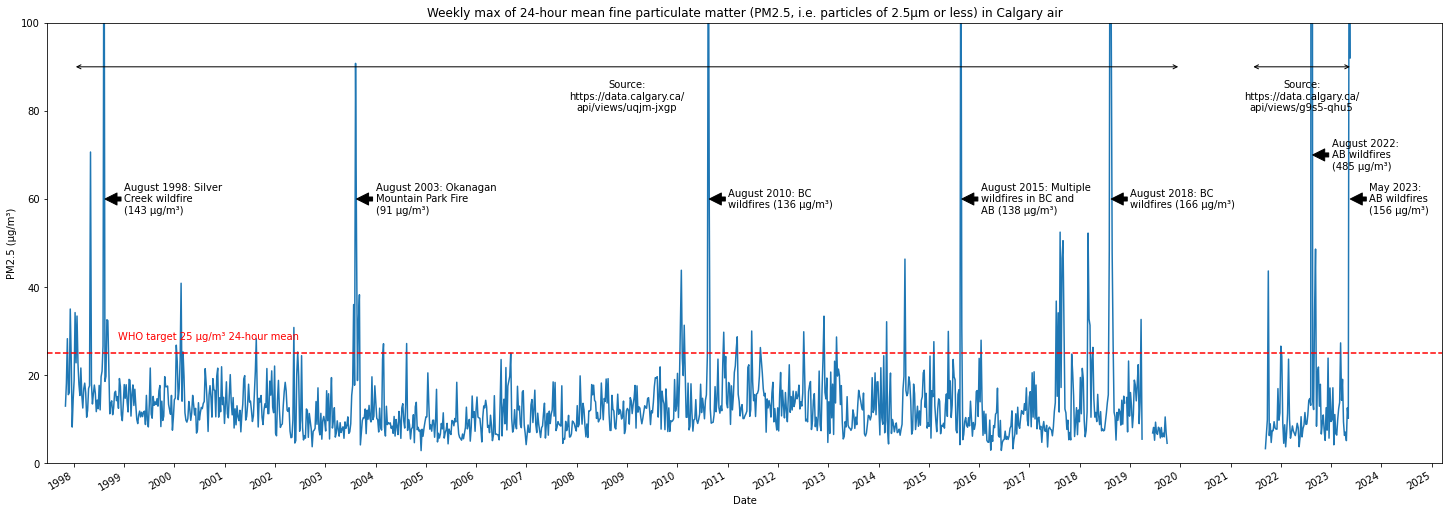

In [8]:
fig, ax = plt.subplots(figsize=(25,9))
df_weekly_max.plot(ax=ax, legend=False)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()
ax.set_title('Weekly max of 24-hour mean fine particulate matter (PM2.5, i.e. particles of 2.5μm or less) in Calgary air')
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 (μg/m³)')

margin = df_weekly_max.shape[0]/10
ax.set_xlim(ax.get_xlim()[0]-margin, ax.get_xlim()[1]+5*margin)
ax.set_ylim(0,100)

kws = dict(
    xycoords='data', xytext=(20, 0), textcoords='offset points',
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='left', verticalalignment='center'
)

annotations = [
    ('1998-08-08',60,'August 1998: Silver\nCreek wildfire\n(143 μg/m³)'),
    ('2003-08-09',60,'August 2003: Okanagan\nMountain Park Fire\n(91 μg/m³)'),
    ('2010-08-14',60,'August 2010: BC\nwildfires (136 μg/m³)'),
    ('2015-08-22',60,'August 2015: Multiple\nwildfires in BC and\nAB (138 μg/m³)'),
    ('2018-08-11',60,'August 2018: BC\nwildfires (166 μg/m³)'),
    ('2022-08-13',70,'August 2022:\nAB wildfires\n(485 μg/m³)'),
    ('2023-05-13',60,'May 2023:\nAB wildfires\n(156 μg/m³)'),
]

for annot in annotations:
    ax.annotate(annot[2], xy=(pd.to_datetime(annot[0]), annot[1]), **kws)

ax.text(
    pd.to_datetime('2009-01-01'), 80,
    'Source:\nhttps://data.calgary.ca/\napi/views/uqjm-jxgp',
    ha='center'
)
ax.annotate('', xy=(pd.to_datetime('1998-01-01'),90), xytext=(pd.to_datetime('2020-01-01'),90), arrowprops=dict(arrowstyle='<->'))

ax.text(
    pd.to_datetime('2022-06-01'), 80,
    'Source:\nhttps://data.calgary.ca/\napi/views/g9s5-qhu5',
    ha='center'
)
ax.annotate('', xy=(pd.to_datetime('2021-06-01'),90), xytext=(pd.to_datetime('2023-06-01'),90), arrowprops=dict(arrowstyle='<->'))

ax.axhline(y=25, c='red', ls='--')
ax.text(10550,28,'WHO target 25 μg/m³ 24-hour mean',c='red')

plt.show()